TOPSIS Scores: [0.17479056 0.21298427 0.24586196 0.42343919 0.32146761 0.2665408
 0.35031898 0.34119438 0.35156284 0.56284546 0.77262258 0.36359164
 0.58641365 0.51515349 0.39865544 0.42059918 0.44058091 0.30621164
 0.22455551 0.40361269 0.22523732 0.20455371 0.24551276 0.28925783
 0.2234717  0.38983477 0.40747543 0.27912682 0.197563  ]
TOPSIS Ranks: [ 1  4  9 24 14 10 16 15 17 27 29 18 28 26 20 23 25 13  6 21  7  3  8 12
  5 19 22 11  2]
VIKOR Scores: [0.90026763 0.92331053 0.94249335 0.73426175 0.94074271 0.97125524
 0.78597887 0.60172663 0.62863049 0.44048178 0.5        0.38085891
 0.63999079 0.67264973 0.84756176 0.8546301  0.83542305 0.92755685
 0.81254532 0.72808381 0.77714589 0.86568127 0.79023604 0.89874759
 0.44522109 0.82443302 0.8733835  0.77866408 0.83131196]
VIKOR Ranks: [ 6  5  2 20  3  1 17 25 24 28 26 29 23 22 11 10 12  4 15 21 19  9 16  7
 27 14  8 18 13]
PROMETHEE I Net Flow: [ 0.22548214  0.143625    0.10221429  0.15103571 -0.184875    0.05685357
  0.39027143  0.0224

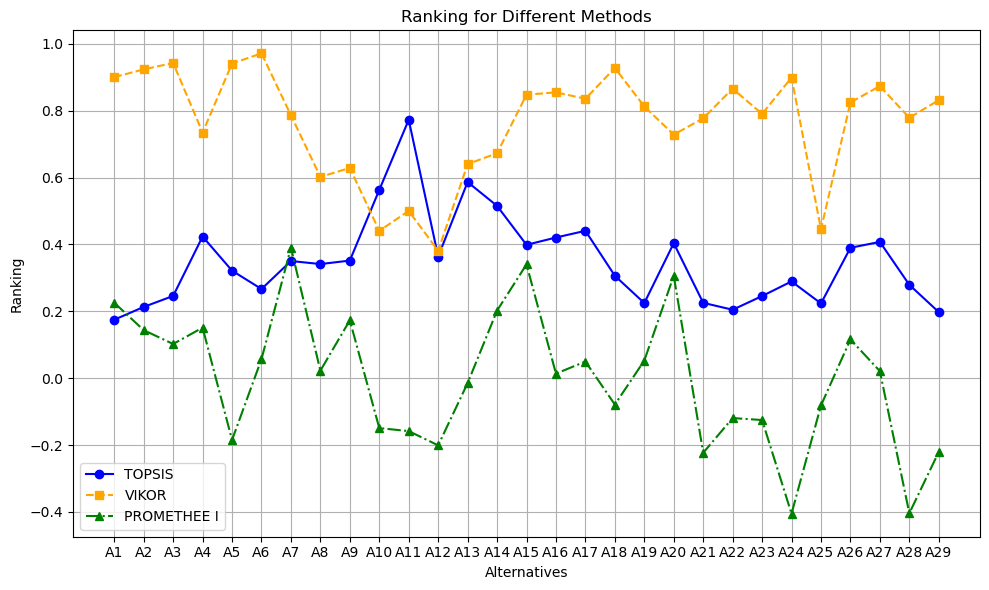

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
from sklearn.preprocessing import MinMaxScaler

# Function for TOPSIS
def topsis(decision_matrix, weights, is_benefit):
    # Step 1: Normalize the decision matrix
    norm_matrix = decision_matrix / np.sqrt((decision_matrix**2).sum(axis=0))
    
    # Step 2: Weighted normalized matrix
    weighted_matrix = norm_matrix * weights
    
    # Step 3: Identify the ideal best and worst solutions
    ideal_best = np.where(is_benefit, np.max(weighted_matrix, axis=0), np.min(weighted_matrix, axis=0))
    ideal_worst = np.where(is_benefit, np.min(weighted_matrix, axis=0), np.max(weighted_matrix, axis=0))
    
    # Step 4: Calculate the distance to the ideal best and worst solutions
    dist_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
    dist_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))
    
    # Step 5: Calculate the performance score
    scores = dist_worst / (dist_best + dist_worst)
    
    # Step 6: Rank alternatives
    ranks = np.argsort(np.argsort(scores)) + 1
    return scores, ranks

# Function for VIKOR
def vikor(decision_matrix, weights, is_benefit, v=0.5):
    # Step 1: Normalize the decision matrix
    norm_matrix = np.where(is_benefit, decision_matrix / np.max(decision_matrix, axis=0), np.min(decision_matrix, axis=0) / decision_matrix)
    
    # Step 2: Weighted normalized matrix
    weighted_matrix = norm_matrix * weights
    
    # Step 3: Identify ideal and anti-ideal solutions
    ideal_best = np.max(weighted_matrix, axis=0)
    ideal_worst = np.min(weighted_matrix, axis=0)
    
    # Step 4: Calculate utility (S) and regret (R)
    S = np.sum((ideal_best - weighted_matrix) / (ideal_best - ideal_worst), axis=1)
    R = np.max((ideal_best - weighted_matrix) / (ideal_best - ideal_worst), axis=1)
    
    # Step 5: Calculate the VIKOR index (Q)
    S_min, S_max = np.min(S), np.max(S)
    R_min, R_max = np.min(R), np.max(R)
    Q = v * (S - S_min) / (S_max - S_min) + (1 - v) * (R - R_min) / (R_max - R_min)
    
    # Step 6: Rank alternatives
    ranks = np.argsort(np.argsort(-Q)) + 1
    return Q, ranks

# Function for PROMETHEE I
def promethee_I(decision_matrix, weights, preference_direction):
    num_alternatives = decision_matrix.shape[0]
    preference_matrix = np.zeros((num_alternatives, num_alternatives))
    
    # Step 1: Compute the preference matrix
    for i in range(num_alternatives):
        for j in range(num_alternatives):
            if i != j:
                diff = decision_matrix[i] - decision_matrix[j]
                preference_matrix[i, j] = np.sum(weights * (diff > 0 if preference_direction else diff < 0))
    
    # Step 2: Calculate the leaving and entering flows
    leaving_flow = preference_matrix.sum(axis=1) / (num_alternatives - 1)
    entering_flow = preference_matrix.sum(axis=0) / (num_alternatives - 1)
    
    # Step 3: Calculate net flow
    net_flow = leaving_flow - entering_flow
    
    # Step 4: Rank alternatives
    ranks = np.argsort(np.argsort(net_flow)) + 1
    return net_flow, ranks

# Decision matrix (A1 to A29 with subcriteria values)
decision_matrix = np.array([
    [87, 6.58, 0.00, 6.39, 1856.88, 25.85, 68.29, 1876.10, 2.00, 1.29, 3.05, 955956.96],
    [87, 3.74, 0.00, 4.65, 1460.98, 24.02, 70.00, 1664.46, 2.00, 1.29, 3.05, 1194946.20],
    [87, 3.27, 6.90, 2.34, 909.26, 26.86, 72.58, 2543.35, 2.00, 3.23, 4.24, 819391.68],
    [87, 0.62, 6.90, 3.96, 1106.25, 25.74, 72.61, 1398.95, 7.00, 12.24, 11.78, 751109.04],
    [87, 1.92, 6.90, 4.91, 368.53, 25.18, 73.77, 1177.83, 3.00, 2.99, 4.78, 409695.84],
    [87, 2.81, 3.45, 5.74, 1183.15, 24.43, 70.71, 850.67, 3.00, 2.99, 4.78, 785250.36],
    [59, 5.30, 10.34, 2.47, 1734.93, 27.39, 62.58, 3183.05, 7.00, 12.24, 11.78, 990098.28],
    [59, 5.85, 6.90, 3.14, 707.32, 27.33, 69.56, 820.72, 7.00, 12.24, 11.78, 512119.80],
    [59, 4.66, 6.90, 2.74, 943.08, 27.02, 64.95, 1820.08, 7.00, 12.24, 11.78, 751109.04],
    [51, 1.34, 6.90, 1.08, 426.14, 33.28, 77.45, 14045.18, 5.00, 6.13, 7.40, 341413.20],
    [51, 0.62, 3.45, 0.98, 358.53, 35.75, 70.17, 14007.81, 14.00, 9.85, 8.63, 307271.88],
    [60, 1.76, 3.45, 2.36, 966.46, 26.29, 73.72, 5175.47, 3.00, 4.60, 2.79, 614543.76],
    [60, 1.87, 10.34, 1.16, 731.49, 33.54, 71.87, 20610.13, 4.00, 5.04, 3.84, 546261.12],
    [75, 3.35, 10.34, 1.05, 580.72, 34.14, 72.02, 16714.12, 4.00, 3.41, 5.04, 546261.12],
    [75, 2.36, 17.24, 1.92, 1309.44, 30.84, 69.43, 9454.41, 4.00, 3.41, 5.04, 1024239.60],
    [75, 2.20, 13.79, 2.22, 401.38, 29.01, 69.05, 9061.13, 4.00, 3.41, 5.04, 512119.80],
    [60, 1.81, 17.24, 2.34, 1517.23, 26.50, 70.21, 9305.85, 4.00, 3.41, 5.04, 648685.08],
    [75, 1.83, 13.79, 3.88, 835.89, 26.90, 69.59, 3531.56, 2.00, 2.27, 4.31, 751109.04],
    [75, 3.09, 6.90, 4.38, 933.95, 24.50, 71.15, 1563.89, 2.00, 2.27, 4.31, 1160804.88],
    [75, 0.52, 17.24, 3.30, 1592.10, 28.25, 71.85, 4329.06, 5.00, 8.02, 9.84, 1092522.24],
    [26, 5.50, 0.00, 10.63, 1553.26, 27.17, 76.58, 246.04, 1.00, 2.13, 3.27, 785250.36],
    [74, 4.20, 0.00, 8.93, 1882.02, 26.44, 73.03, 212.73, 1.00, 2.13, 3.27, 921815.64],
    [74, 2.77, 6.90, 4.55, 904.45, 26.54, 71.28, 954.77, 2.00, 2.27, 4.31, 887674.32],
    [75, 2.89, 0.00, 5.56, 820.25, 24.43, 69.16, 561.44, 2.00, 1.56, 2.43, 375554.52],
    [59, 5.98, 3.45, 2.98, 455.52, 28.05, 72.10, 2076.38, 3.00, 4.60, 2.79, 614543.76],
    [87, 1.91, 10.34, 2.84, 1065.56, 26.24, 71.01, 3260.21, 6.00, 14.64, 3.76, 546261.12],
    [75, 1.98, 17.24, 2.72, 612.36, 28.70, 70.62, 7656.79, 4.00, 3.41, 5.04, 477978.48],
    [26, 3.33, 0.00, 12.79, 1204.25, 27.77, 75.50, 180.56, 1.00, 2.13, 3.27, 580402.44],
    [26, 5.19, 0.00, 10.91, 742.32, 27.26, 76.89, 253.49, 1.00, 2.13, 3.27, 1058380.92]
])

# Replace 0.00 with 0.001 in the decision_matrix
decision_matrix[decision_matrix == 0.00] = 0.001



# Corresponding weights for the criteria
weights = np.array([0.1477, 0.1477, 0.0319, 0.0319, 0.0668, 0.0319, 0.0163, 0.1477, 0.1477, 0.0163, 0.0668, 0.1477])

# Benefit (True) or Cost (False) criteria
is_benefit = np.array([False, False, False, False, True, True, True, True, True, True, True, False])


# Run TOPSIS
topsis_scores, topsis_ranks = topsis(decision_matrix, weights, is_benefit)
print("TOPSIS Scores:", topsis_scores)
print("TOPSIS Ranks:", topsis_ranks)

# Run VIKOR
vikor_scores, vikor_ranks = vikor(decision_matrix, weights, is_benefit)
print("VIKOR Scores:", vikor_scores)
print("VIKOR Ranks:", vikor_ranks)

# Run PROMETHEE I
promethee_net_flow, promethee_ranks = promethee_I(decision_matrix, weights, preference_direction=True)
print("PROMETHEE I Net Flow:", promethee_net_flow)
print("PROMETHEE I Ranks:", promethee_ranks)

# Visualizing the results
labels = [f'A{i+1}' for i in range(decision_matrix.shape[0])]
x = np.arange(len(labels))  # the label locations

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(x, topsis_scores, marker='o', label='TOPSIS', linestyle='-', color='blue')
plt.plot(x, vikor_scores, marker='s', label='VIKOR', linestyle='--', color='orange')
plt.plot(x, promethee_net_flow, marker='^', label='PROMETHEE I', linestyle='-.', color='green')

# Add labels and title
plt.xlabel('Alternatives')
plt.ylabel('Ranking')
plt.title('Ranking for Different Methods')
plt.xticks(x, labels)  # Set x-tick labels
plt.legend()  # Show legend

# Show the plot
plt.grid()  # Add grid for better readability
plt.tight_layout()  # Adjust layout
plt.show()
